# MACS Project
This is the notebook for evaluating your chosen datasets. Feel free to experiment, there are also good tutorials around in the web.
***
Let us first start by importing the used libraries in Python. If you need additional libraries, just add them here and re-run the cell for a better overview.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

If no error message occurs, the libraries are all found and ready to use. Otherwise, you might have to install them.
***
Next, we continue importing our datasets. There are different imports available depending on dataset types (see https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [7]:
# Read the file "data.csv" (must be in same folder than the notebook,
# otherwise you have to add the corresponding path) and assign it to
# the variable named "car"
car = pd.read_csv("data.csv")

After importing the data, we can have a look on it as well as applying some metrics.

In [5]:
# Displays the first three lines of the dataset
car.head(3)

,Unnamed: 0,ISO,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,ACTOR2,ASSOC_ACTOR_2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,SOURCE,NOTES,FATALITIES,TIMESTAMP
0,0,12,2010-12-20,Battles,Armed clash,Military Forces of Algeria (1999-),NaN,Unidentified Armed Group (Algeria),NaN,13,Northern Africa,Algeria,Boumerdes,Ammal,Ait Dahmane,TSA Algerie,A militant was captured by security forces on ...,0,1563903165
1,1,12,2010-12-25,Riots,Violent demonstration,Police Forces of Algeria (1999-),NaN,Rioters (Algeria),NaN,15,Northern Africa,Algeria,Alger,Sidi M'Hamed,Algiers,Liberte (Algeria),Riots broke out in districts covered by the pr...,0,1579554013
2,2,12,2010-12-26,Battles,Armed clash,AQIM: Al Qaeda in the Islamic Maghreb,NaN,Military Forces of Algeria (1999-),NaN,12,Northern Africa,Algeria,Jijel,Jijel,Jijel,Xinhua,Two AQLMI militants are killed and five wounde...,2,1572403789


In [8]:
# Displays the last three lines of the dataset
car.tail(3)

,Unnamed: 0,ISO,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,ACTOR2,ASSOC_ACTOR_2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,SOURCE,NOTES,FATALITIES,TIMESTAMP
170575,170575,894,2020-10-14,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,Police Forces of Zambia (2011-),Civilians (Zambia),15,Southern Africa,Zambia,Muchinga,Mpika,Mpika,Zambia Reports,"On 14 October 2020, UNDP members attacked resi...",0,1603142908
170576,170576,894,2020-10-15,Riots,Mob violence,Rioters (Zambia),NaN,Civilians (Zambia),Teachers (Zambia),57,Southern Africa,Zambia,Lusaka,Lusaka,Lusaka,Lusaka Times,"On 15 October 2020, Ng'ombe compound residents...",0,1603142907
170577,170577,894,2020-10-20,Violence against civilians,Sexual violence,Police Forces of Zambia (2011-),NaN,Civilians (Zambia),Women (Zambia),17,Southern Africa,Zambia,Lusaka,Lusaka,Lusaka,Mwebantu; Zambia Watchdog,"On 20 October 2020, police officers undressed ...",0,1603753024


In [9]:
# Shows various information, e.g. amount of lines, columns,
# how many of them have missing values (Null) and data types
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170578 entries, 0 to 170577
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      170578 non-null  int64 
 1   ISO             170578 non-null  int64 
 2   EVENT_DATE      170578 non-null  object
 3   EVENT_TYPE      170578 non-null  object
 4   SUB_EVENT_TYPE  170578 non-null  object
 5   ACTOR1          170578 non-null  object
 6   ASSOC_ACTOR_1   44078 non-null   object
 7   ACTOR2          120235 non-null  object
 8   ASSOC_ACTOR_2   31630 non-null   object
 9   INTERACTION     170578 non-null  int64 
 10  REGION          170578 non-null  object
 11  COUNTRY         170578 non-null  object
 12  ADMIN1          170578 non-null  object
 13  ADMIN2          170497 non-null  object
 14  LOCATION        170578 non-null  object
 15  SOURCE          170578 non-null  object
 16  NOTES           170569 non-null  object
 17  FATALITIES      170578 non-nu

In [10]:
# We can calculate mean, standard deviation, min/max
# on numerical attributes
car.describe()

,Unnamed: 0,ISO,INTERACTION,FATALITIES,TIMESTAMP
count,170578.000000,170578.000000,170578.000000,170578.000000,1.705780e+05
mean,85288.500000,524.649926,34.586606,1.750302,1.575371e+09
std,49241.771446,251.680535,19.075241,9.874958,1.244702e+07
min,0.000000,12.000000,10.000000,0.000000,1.552576e+09
25%,42644.250000,324.000000,15.000000,0.000000,1.567462e+09
50%,85288.500000,566.000000,37.000000,0.000000,1.572404e+09
75%,127932.750000,716.000000,57.000000,1.000000,1.581982e+09
max,170577.000000,894.000000,88.000000,750.000000,1.603756e+09


In [11]:
# The following command checks for all values if they are null
# (Boolean) and summarizes them
car.isnull().sum()

Unnamed: 0             0
ISO                    0
EVENT_DATE             0
EVENT_TYPE             0
SUB_EVENT_TYPE         0
ACTOR1                 0
ASSOC_ACTOR_1     126500
ACTOR2             50343
ASSOC_ACTOR_2     138948
INTERACTION            0
REGION                 0
COUNTRY                0
ADMIN1                 0
ADMIN2                81
LOCATION               0
SOURCE                 0
NOTES                  9
FATALITIES             0
TIMESTAMP              0
dtype: int64

In [12]:
# Selecting a single column with squared brackets
car['ISO']

0          12
1          12
2          12
3          12
4          12
         ... 
170573    894
170574    894
170575    894
170576    894
170577    894
Name: ISO, Length: 170578, dtype: int64

In [16]:
# Selecting data matching a predicate (here: attribute with
# missing values)
car[car['ADMIN2'].isnull()]

,Unnamed: 0,ISO,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,ACTOR2,ASSOC_ACTOR_2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,SOURCE,NOTES,FATALITIES,TIMESTAMP
48820,48820,426,2011-08-15,Protests,Peaceful protest,Protesters (Lesotho),NaN,NaN,NaN,60,Southern Africa,Lesotho,Maseru,NaN,Maseru,All Africa,Protests against government,0,1552577530
48821,48821,426,2011-08-15,Protests,Protest with intervention,Police Forces of Lesotho (1998-2012),NaN,Protesters (Lesotho),NaN,16,Southern Africa,Lesotho,Maseru,NaN,Maseru,All Africa,Police open fire on protesters,0,1552577530
48822,48822,426,2011-08-16,Protests,Peaceful protest,Protesters (Lesotho),NaN,NaN,NaN,60,Southern Africa,Lesotho,Maseru,NaN,Maseru,All Africa,Protests against government,0,1552577530
48823,48823,426,2011-08-17,Protests,Peaceful protest,Protesters (Lesotho),NaN,NaN,NaN,60,Southern Africa,Lesotho,Maseru,NaN,Maseru,All Africa,Protests against government,0,1552577530
48824,48824,426,2012-01-20,Riots,Mob violence,Rioters (Egypt),Vigilante Group (Lesotho),Civilians (Lesotho),NaN,57,Southern Africa,Lesotho,Leribe,NaN,Pitseng,Lesotho Times,"On 20 January 2012, 2 robbers were attacked by...",0,1588021639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48896,48896,426,2020-08-26,Violence against civilians,Attack,Police Forces of Lesotho (2019-),NaN,Civilians (Lesotho),NaN,17,Southern Africa,Lesotho,Quthing,NaN,Quthing,Lesotho Times,"Around 26 August 2020 (week of), two men were ...",0,1600112998
48897,48897,426,2020-08-29,Violence against civilians,Attack,Police Forces of Lesotho (2019-),NaN,Civilians (Lesotho),NaN,17,Southern Africa,Lesotho,Mafeteng,NaN,Mafeteng,Lesotho Times,"Around 29 August 2020 (weekend of), a man was ...",1,1600112998
48898,48898,426,2020-08-29,Violence against civilians,Attack,Police Forces of Lesotho (2019-),NaN,Civilians (Lesotho),NaN,17,Southern Africa,Lesotho,Butha-Buthe,NaN,Butha-Buthe,Lesotho Times,"Around 29 August 2020 (weekend of), a man was ...",0,1600112998
48899,48899,426,2020-09-01,Violence against civilians,Attack,Police Forces of Lesotho (2019-),NaN,Civilians (Lesotho),NaN,17,Southern Africa,Lesotho,Maseru,NaN,Semonkong,Lesotho Times,"Around 1 September 2020 (as reported), a man w...",0,1600112998


In [ ]:
# Replace NaN (null) values with e.g. 'unknown' string
car['Market Category'].fillna('unknown', inplace=True)

In [ ]:
car['Market Category'].isnull().sum()

In [17]:
# Calculates the correlation coefficient between attributes
car.corr()

,Unnamed: 0,ISO,INTERACTION,FATALITIES,TIMESTAMP
Unnamed: 0,1.000000,0.957892,0.011617,0.002175,-0.100804
ISO,0.957892,1.000000,-0.015084,0.008977,-0.118165
INTERACTION,0.011617,-0.015084,1.000000,-0.086459,-0.120003
FATALITIES,0.002175,0.008977,-0.086459,1.000000,0.018892
TIMESTAMP,-0.100804,-0.118165,-0.120003,0.018892,1.000000


If you need more information about commands, you can have a look on the documentation:
* info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
* describe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
* isnull: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
* fillna: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
* corr: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
***
Next, we can also use plots to visualize attributes (Matplotlib, https://matplotlib.org/api/pyplot_api.html).

(array([1.70267e+05, 2.11000e+02, 4.60000e+01, 1.30000e+01, 1.70000e+01,
        1.10000e+01, 2.00000e+00, 6.00000e+00, 2.00000e+00, 3.00000e+00]),
 array([  0.,  75., 150., 225., 300., 375., 450., 525., 600., 675., 750.]),
 <a list of 10 Patch objects>)

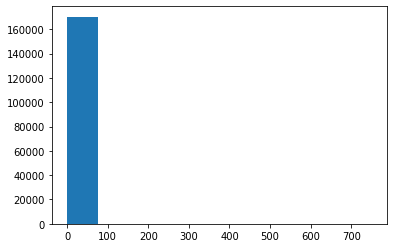

In [18]:
# Histogram; good to see distribution of values
plt.hist(car['FATALITIES'])

(array([ 7497., 28172.,  4934.,  2351., 18169., 10802., 16878., 40135.,
        27205., 14435.]),
 array([ 12. , 100.2, 188.4, 276.6, 364.8, 453. , 541.2, 629.4, 717.6,
        805.8, 894. ]),
 <a list of 10 Patch objects>)

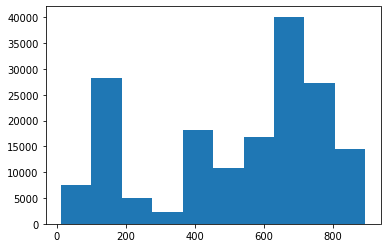

In [20]:
# It also works on categorical attributes
plt.hist(car['ISO'])

In [ ]:
# Pie chart; First argument counts all appearings per unique value,
# second argument is for the labeling
plt.pie(car['Vehicle Size'].value_counts(), labels=car['Vehicle Size'].unique())

In [18]:
# Simple line plot, for car dataset not that useful
# (better if your data is ordered by some criterium)
plt.plot(car['MSRP'])

KeyError: 'MSRP'

There are many more plot types and also customization. If you are interested, feel free to have a look on them.
* https://matplotlib.org/3.3.2/tutorials/introductory/sample_plots.html
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
* https://matplotlib.org/tutorials/introductory/pyplot.html